In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

df = pd.read_csv("../df_cleaned.csv")


y = df["BRCAstatesNew"]
X = df.drop(["BRCAstatesNew"], axis =1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [11]:
!pip install lightgbm

In [12]:
from lightgbm import LGBMClassifier

In [13]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 2325, number of used features: 102
[LightGBM] [Info] Start training from score -0.186200
[LightGBM] [Info] Start training from score -2.682571
[LightGBM] [Info] Start training from score -2.947454
[LightGBM] [Info] Start training from score -7.751475
[LightGBM] [Info] Start training from score -3.097515
[LightGBM] [Info] Start training from score -6.142037
[LightGBM] [Info] Start training from score -6.652863
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [20]:
y_pred = lgbm_model.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.9979939819458375

In [24]:
#model tuning
lgbm = LGBMClassifier()

In [26]:
lgbm_params = {"learning_rate": [0.001, 0.1],
              "n_estimators": [200, 100],
              "max_depth": [2,8]}

In [28]:
lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, n_jobs = -1).fit(X_train, y_train)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 2325, number of used features: 102
[LightGBM] [Info] Start training from score -0.186200
[LightGBM] [Info] Start training from score -2.682571
[LightGBM] [Info] Start training from score -2.947454
[LightGBM] [Info] Start training from score -7.751475
[LightGBM] [Info] Start training from score -3.097515
[LightGBM] [Info] Start training from score -6.142037
[LightGBM] [Info] Start training from score -6.652863
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [30]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}

In [32]:
lgbm_tuned = LGBMClassifier(learning_rate= 0.1, max_depth= 2, n_estimators= 200).fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 2325, number of used features: 102
[LightGBM] [Info] Start training from score -0.186200
[LightGBM] [Info] Start training from score -2.682571
[LightGBM] [Info] Start training from score -2.947454
[LightGBM] [Info] Start training from score -7.751475
[LightGBM] [Info] Start training from score -3.097515
[LightGBM] [Info] Start training from score -6.142037
[LightGBM] [Info] Start training from score -6.652863
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [34]:
y_pred = lgbm_tuned.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred)

0.9989969909729187

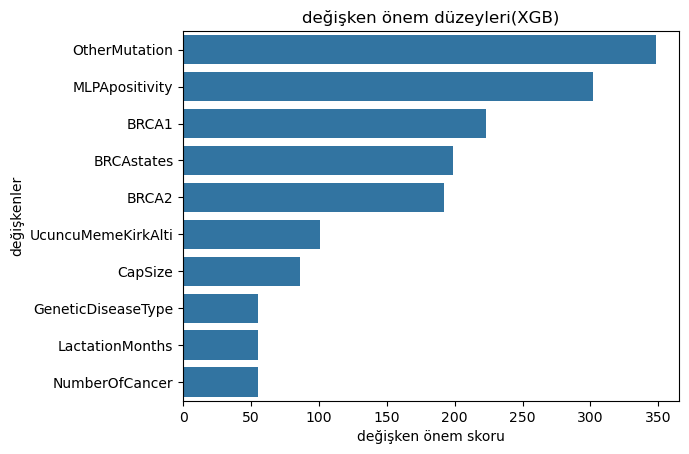

In [39]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(10)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("değişken önem skoru")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri(XGB)")
plt.show()